In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [93]:
df = pd.read_csv('/Users/samaguiar/Desktop/university-of-the-cumberlands/MSDS_530/week6_assignments/ky_districts_19_20_subset.csv')

In [94]:
df.head()

,District Name,Type,Total Revenue,number of students,Student Teacher Ratio,total number of schools,%white,%black,%hispanic,%asian,%American indian,%two or more,%of families below poverty level
0,Adair County,Town: Remote,"31,510,000.00","2,601.00",14.95,5,92,2,2,0,0,3,26.70
1,Allen County,Rural: Fringe,"35,346,000.00","3,012.00",16.55,6,95,1,2,0,0,2,26.60
2,Anchorage Independent,Suburb: Large,"8,786,000.00",400.00,10.55,1,89,3,2,4,0,2,2.30
3,Breckinridge County,Rural: Distant,"34,321,000.00","2,707.00",16.51,6,93,2,2,0,0,3,24.20
4,Bourbon County,Town: Distant,"287,356,000.00","20,201.00",14.83,28,86,4,5,2,0,3,6.20


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   District Name                     30 non-null     object 
 1   Type                              30 non-null     object 
 2   Total Revenue                     30 non-null     object 
 3   number of students                30 non-null     object 
 4   Student Teacher Ratio             30 non-null     float64
 5   total number of schools           30 non-null     int64  
 6   %white                            30 non-null     int64  
 7   %black                            30 non-null     int64  
 8   %hispanic                         30 non-null     int64  
 9   %asian                            30 non-null     int64  
 10  %American indian                  30 non-null     int64  
 11  %two or more                      30 non-null     int64  
 12  %of famili

In [96]:
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'].replace(',', '', regex=True), errors='coerce')
df['number of students'] = pd.to_numeric(df['number of students'].replace(',', '', regex=True), errors='coerce')
df['Total Revenue'] = df['Total Revenue'].astype(int)
df['number of students'] = df['number of students'].astype(int)

In [97]:
df.describe()

,Total Revenue,number of students,Student Teacher Ratio,total number of schools,%white,%black,%hispanic,%asian,%American indian,%two or more,%of families below poverty level
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,119089800.00,8156.07,14.84,16.30,85.53,6.30,3.80,1.17,0.10,2.73,22.23
std,285580749.89,18134.33,1.57,32.09,9.19,6.05,2.78,1.39,0.31,1.14,11.19
min,8151000.00,400.00,10.55,1.00,66.00,0.00,0.00,0.00,0.00,1.00,2.30
25%,27244250.00,1910.25,13.83,5.00,77.25,2.00,2.00,0.00,0.00,2.00,14.10
50%,32915500.00,2654.00,15.07,7.00,88.00,4.00,3.00,1.00,0.00,3.00,23.85
75%,60060500.00,4334.50,15.89,11.00,92.75,11.50,5.75,2.00,0.00,3.00,29.32
max,1491611000.00,94393.00,17.54,168.00,97.00,22.00,10.00,5.00,1.00,5.00,44.40


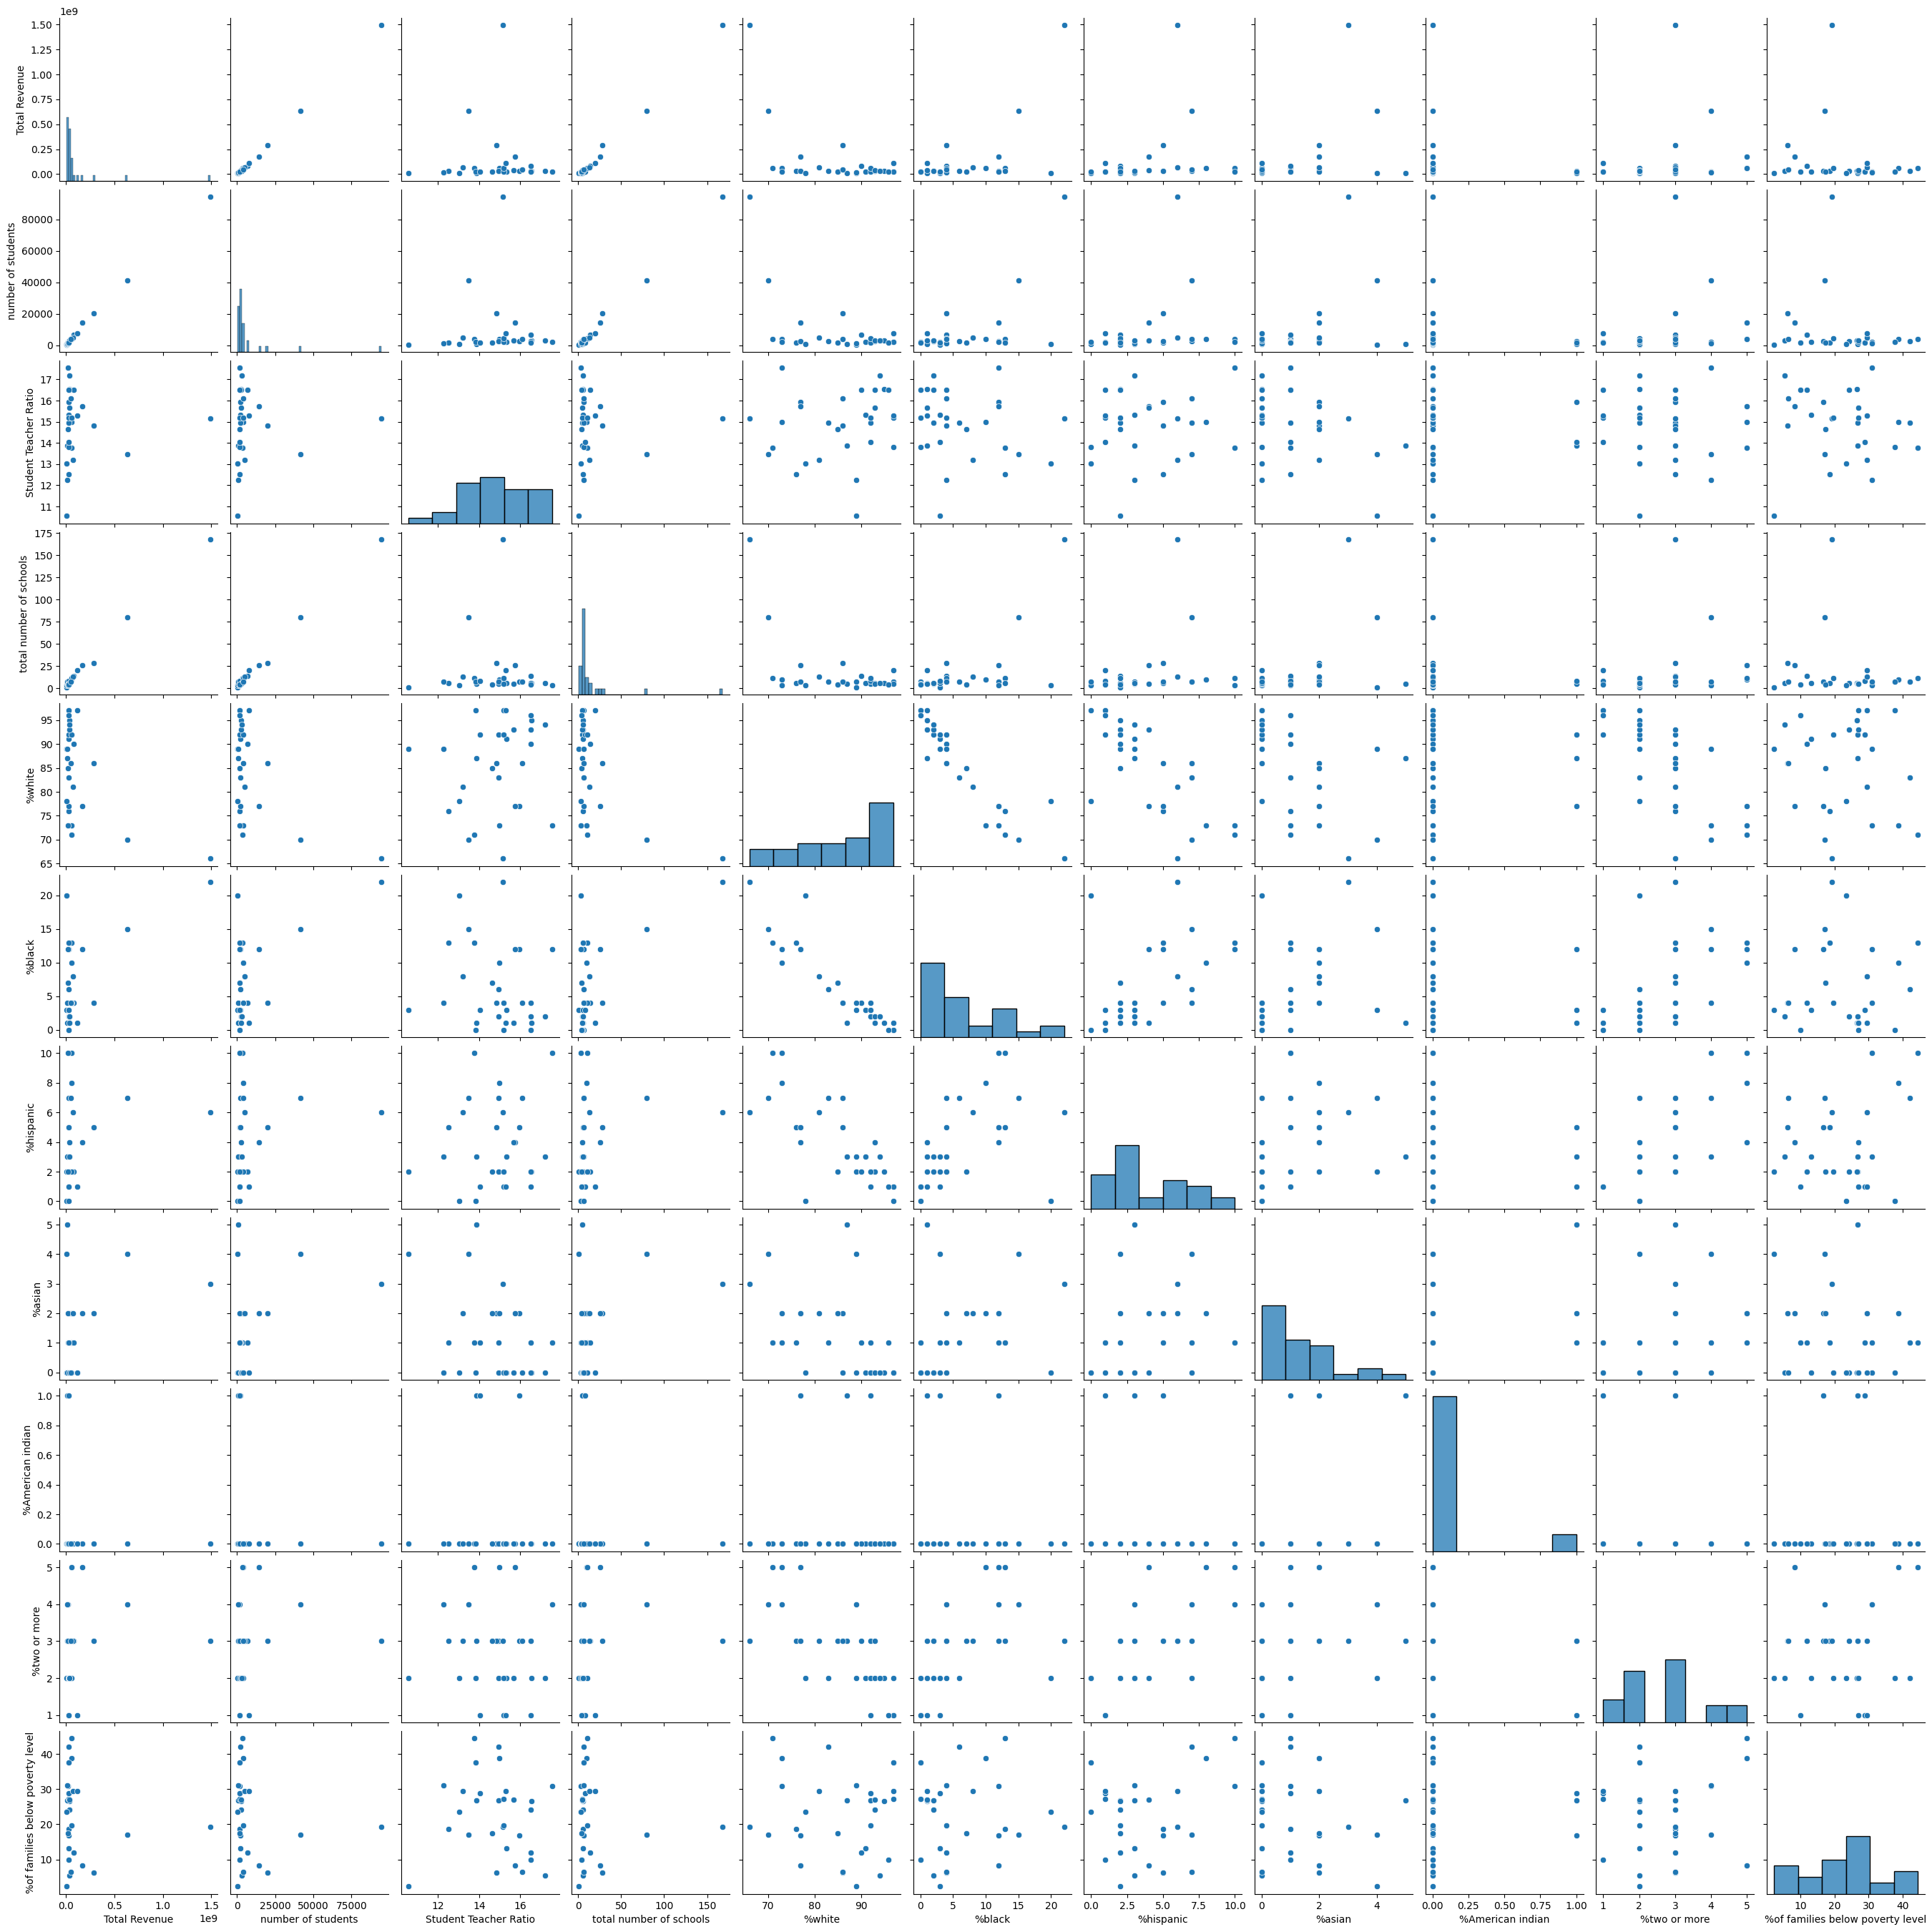

In [98]:
sns.pairplot(df)

In [99]:
X = df[['number of students', 'Student Teacher Ratio', 'total number of schools', '%of families below poverty level']]
y = df['Total Revenue']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [101]:
# Fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [102]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([2.73946531e+07, 2.22992146e+07, 1.53799629e+07, 2.14134970e+07,
       2.45877483e+07, 6.52749024e+08])

In [103]:
# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred) ** 0.5)

Mean Absolute Error: 8902824.68742247
Mean Squared Error: 102422187306684.56
Root Mean Squared Error: 10120384.741040459


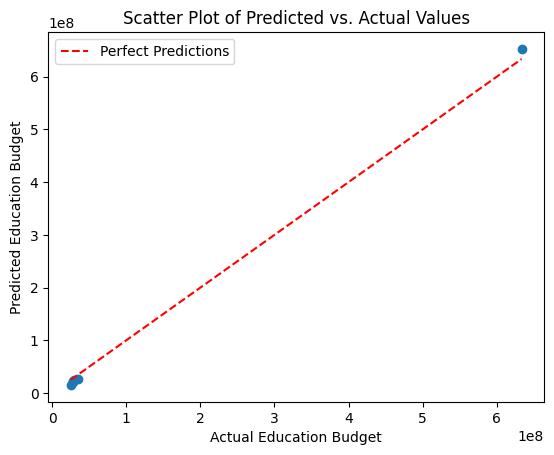

In [107]:
# Visualize predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Education Budget')
plt.ylabel('Predicted Education Budget')
plt.title('Scatter Plot of Predicted vs. Actual Values')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Predictions')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Interpretation of Results
# Print regression coefficients
print('Regression Coefficients:', model.coef_)

# Print R-squared value
print('R-squared:', model.score(X_test, y_test))

Regression Coefficients: [   14160.66218219 -2616383.83794948   960728.72579789   309275.49310158]
R-squared: 0.9979827739410068


In [115]:
import statsmodels.api as sm

# Add a constant term to the independent variables (X)
X_with_const = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X_with_const).fit()

# Print the model summary
print(model.summary())

# Extract p-values for hypothesis testing
p_values = model.pvalues

# Set your significance level
alpha = 0.05

# Perform hypothesis testing
significant_vars = p_values[p_values < alpha].index

# Print the results
print(f'Significant variables: {significant_vars}')



                            OLS Regression Results                            
Dep. Variable:          Total Revenue   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4955.
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           7.65e-36
Time:                        13:15:24   Log-Likelihood:                -526.01
No. Observations:                  30   AIC:                             1062.
Df Residuals:                      25   BIC:                             1069.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   